ARTIFICIAL INTELLIGENCE A.Y 2024 MINI PROJECT

Name: Hiren Mwanje, Maddara
Student ID: 2106657
Start Date: 11 Jan, 2025

In [3]:
# 1. import libs and data processing

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from tensorflow import keras

# Load MNIST dataset
from torchvision.datasets import MNIST

mnist_tr = MNIST(root="../mnist", train=True, download=True)
mnist_te = MNIST(root="../mnist", train=False, download=True)

# Data preprocessing
x_tr = mnist_tr.data.numpy().reshape(60000, 28 * 28) / 255
x_te = mnist_te.data.numpy().reshape(10000, 28 * 28) / 255

mnist_tr_labels = mnist_tr.targets.numpy()
mnist_te_labels = mnist_te.targets.numpy()

# CNN-specific preprocessing
x_tr_conv = x_tr.reshape(-1, 28, 28, 1)
x_te_conv = x_te.reshape(-1, 28, 28, 1)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 61.5MB/s]


Extracting ../mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.82MB/s]

Extracting ../mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../mnist/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.2MB/s]


Extracting ../mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.01MB/s]

Extracting ../mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../mnist/MNIST/raw



In [5]:
# 2. Train MLP and CNN on clean data

# MLP Classifier
MLP = MLPClassifier(hidden_layer_sizes=(500, 500), max_iter=10, random_state=42)
MLP.fit(x_tr, mnist_tr_labels)

# CNN Model
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_tr_conv, mnist_tr_labels, epochs=5)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9042 - loss: 0.3242
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9790 - loss: 0.0718
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9855 - loss: 0.0475
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.9890 - loss: 0.0356
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.9921 - loss: 0.0259


In [ ]:
# 2.b performance on clean data

# Evaluate models on noisy test data
mlp_clean_accuracy = MLP.score(x_te, mnist_te_labels)
cnn_accuracy = cnn_model.evaluate(x_te_conv, mnist_te_labels, verbose=0)[1]

print(f"MLP Accuracy on Clean Data: {mlp_clean_accuracy:.2f}")
print(f"CNN Accuracy on Clean Data: {cnn_accuracy:.2f}")

MLP Accuracy on Clean Data: 0.98
CNN Accuracy on Clean Data: 0.98


From the results obtained above, the two models (MLP and CNN) score equal accuracies


In [ ]:
# 3.Add fixed noise to test data

def add_noise(data, std_dev):
    noise = np.random.normal(0, std_dev, data.shape)
    noisy_data = np.clip(data + noise, 0, 1)  # Ensure pixel values remain in [0, 1]
    return noisy_data

# Add noise with standard deviation of 0.5
x_te_noisy = add_noise(x_te, 0.5)
x_te_noisy_conv = x_te_noisy.reshape(-1, 28, 28, 1)

# Evaluate models on noisy test data
mlp_accuracy = MLP.score(x_te_noisy, mnist_te_labels)
cnn_accuracy = cnn_model.evaluate(x_te_noisy_conv, mnist_te_labels, verbose=0)[1]

print(f"MLP Accuracy on Noisy Data: {mlp_accuracy:.2f}")
print(f"CNN Accuracy on Noisy Data: {cnn_accuracy:.2f}")


MLP Accuracy on Noisy Data: 0.49
CNN Accuracy on Noisy Data: 0.51


the MLP (0.49) performs worse than the CNN (0.51)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


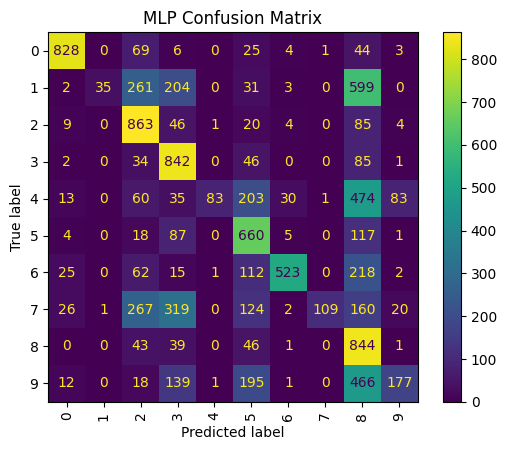

---------


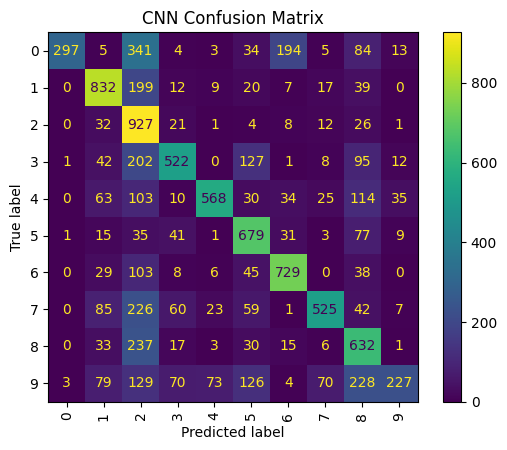

Most challenging digit for MLP: 1


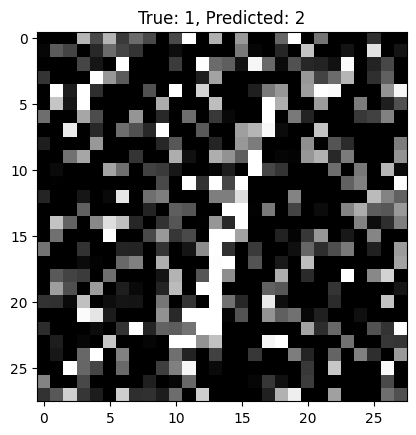

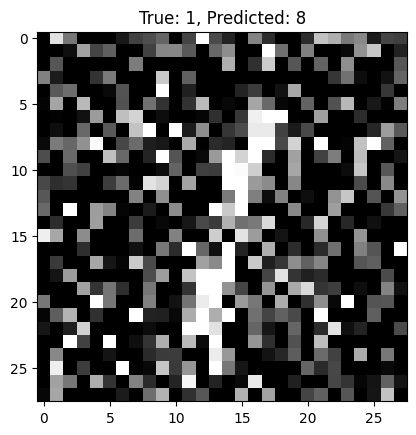

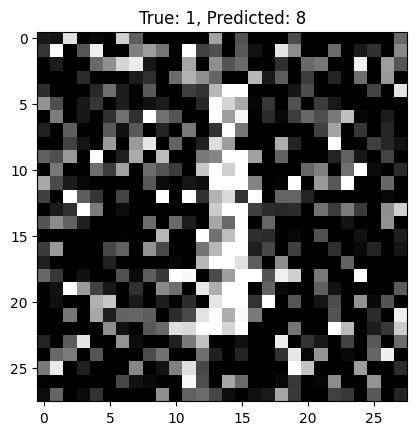

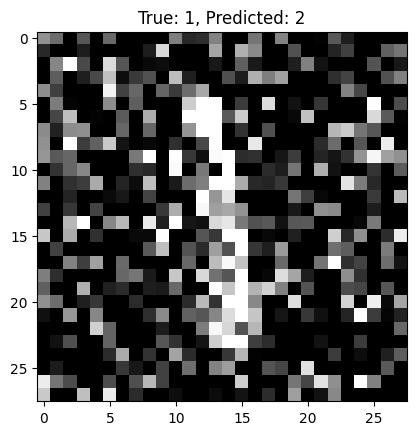

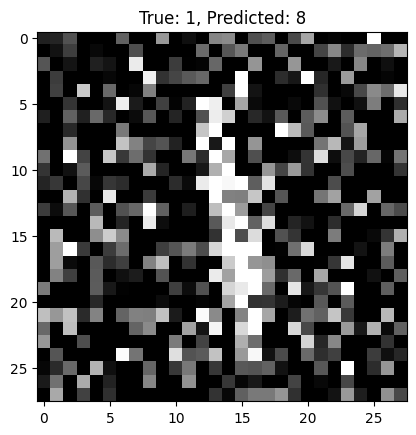

Most challenging digit for CNN: 9


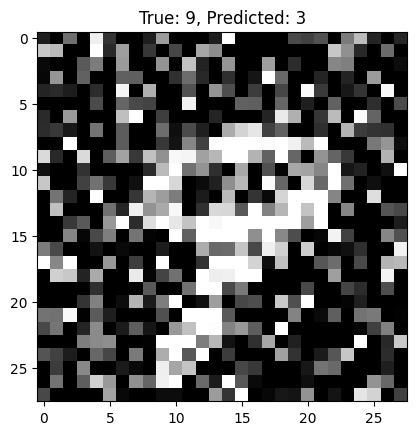

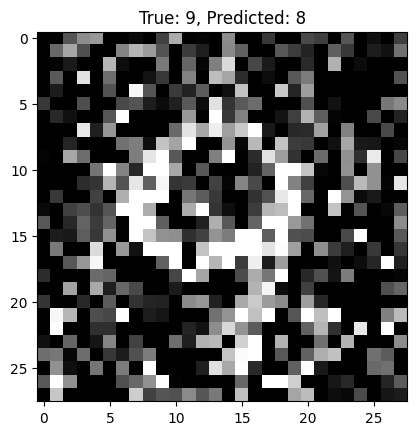

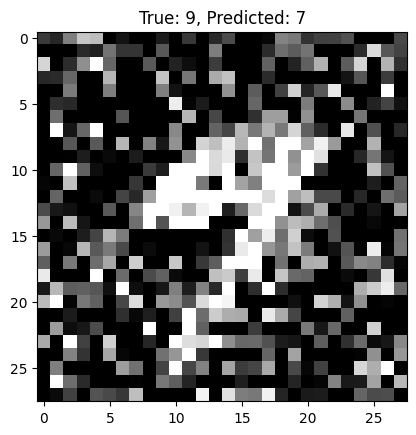

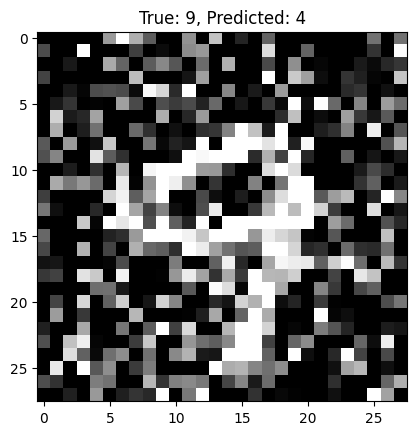

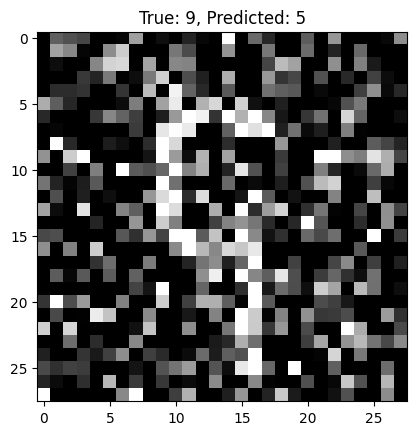

In [6]:
# 4. Find challenging digits
from sklearn.metrics import confusion_matrix

# Predictions and confusion matrices
mlp_predictions = MLP.predict(x_te_noisy)
cnn_predictions = cnn_model.predict(x_te_noisy_conv).argmax(axis=1)

mlp_cm = confusion_matrix(mnist_te_labels, mlp_predictions)
cnn_cm = confusion_matrix(mnist_te_labels, cnn_predictions)

# Display confusion matrices
ConfusionMatrixDisplay(mlp_cm, display_labels=range(10)).plot(cmap="viridis", xticks_rotation='vertical')
plt.title("MLP Confusion Matrix")
plt.show()
print("---------")

ConfusionMatrixDisplay(cnn_cm, display_labels=range(10)).plot(cmap="viridis", xticks_rotation='vertical')
plt.title("CNN Confusion Matrix")
plt.show()

# Visualize misclassified examples
challenging_digit = np.argmax(mlp_cm.sum(axis=1) - np.diag(mlp_cm))
print(f"Most challenging digit for MLP: {challenging_digit}")

misclassified_idx = np.where((mnist_te_labels == challenging_digit) & (mlp_predictions != challenging_digit))[0]

for i in misclassified_idx[:5]:  # Show first 5 misclassified examples
    plt.imshow(x_te_noisy[i].reshape(28, 28), cmap="gray")
    plt.title(f"True: {mnist_te_labels[i]}, Predicted: {mlp_predictions[i]}")
    plt.show()


# misclassified examples for the cnn
challenging_digit = np.argmax(cnn_cm.sum(axis=1) - np.diag(cnn_cm))
print(f"Most challenging digit for CNN: {challenging_digit}")

misclassified_idx_cnn = np.where((mnist_te_labels == challenging_digit) & (cnn_predictions != challenging_digit))[0]
for i in misclassified_idx_cnn[:5]:  # Show first 5 misclassified examples
    plt.imshow(x_te_noisy[i].reshape(28, 28), cmap="gray")
    plt.title(f"True: {mnist_te_labels[i]}, Predicted: {cnn_predictions[i]}")
    plt.show()

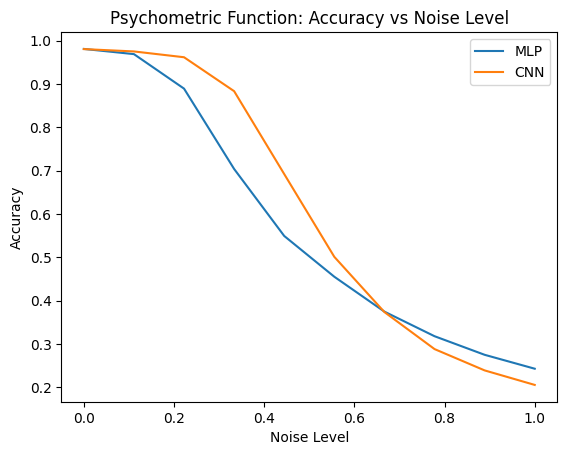

In [7]:
# 5. Pyschometric function

noise_levels = np.linspace(0, 1, 10)  # Noise levels from 0 to 1
mlp_accuracies = []
cnn_accuracies = []

for noise in noise_levels:
    noisy_test_data = add_noise(x_te, noise)
    noisy_test_data_conv = noisy_test_data.reshape(-1, 28, 28, 1)

    mlp_accuracies.append(MLP.score(noisy_test_data, mnist_te_labels))
    cnn_accuracies.append(cnn_model.evaluate(noisy_test_data_conv, mnist_te_labels, verbose=0)[1])

plt.plot(noise_levels, mlp_accuracies, label="MLP")
plt.plot(noise_levels, cnn_accuracies, label="CNN")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy")
plt.title("Psychometric Function: Accuracy vs Noise Level")
plt.legend()
plt.show()

# from the graph i think the cnn is more sensitive to noise in the input, basing on the gradient of its psychometric function plot


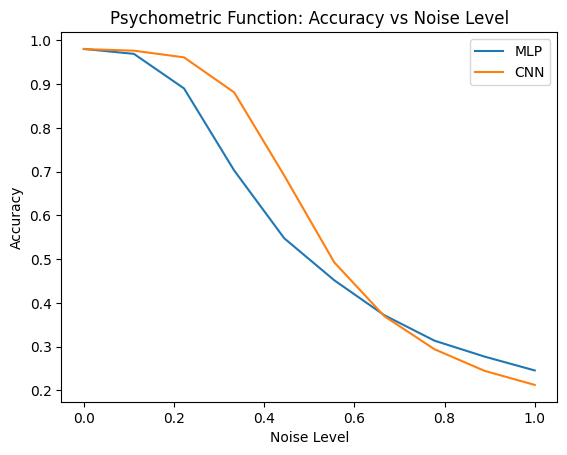

In [8]:
# 6. Add noise to training data

noise_levels = np.linspace(0, 1, 10)  # Noise levels from 0 to 1
mlp_accuracies = []
cnn_accuracies = []

for noise in noise_levels:
    noisy_test_data = add_noise(x_te, noise)
    noisy_test_data_conv = noisy_test_data.reshape(-1, 28, 28, 1)

    mlp_accuracies.append(MLP.score(noisy_test_data, mnist_te_labels))
    cnn_accuracies.append(cnn_model.evaluate(noisy_test_data_conv, mnist_te_labels, verbose=0)[1])

plt.plot(noise_levels, mlp_accuracies, label="MLP")
plt.plot(noise_levels, cnn_accuracies, label="CNN")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy")
plt.title("Psychometric Function: Accuracy vs Noise Level")
plt.legend()
plt.show()


# is it possible to improve accuracy by adding noise to test data

adding to noise to training data (data augmentation) improves revognition accuracy on noisy test data because more robust to similar distortions, because the model learns to generalize better.

hypothesis testing
- generate noisy training data by adding gaussian noise to x_tr
- use noisy data to train new versions of MLP and CNN
- evaluate their performance on noisy test data
- cmopare with models trained on clean test data

In [9]:
# Function to add noise
def add_noise(data, std_dev):
    noise = np.random.normal(0, std_dev, data.shape)
    noisy_data = np.clip(data + noise, 0, 1)  # Ensure pixel values remain in [0, 1]
    return noisy_data

# Add noise to training data
x_tr_noisy = add_noise(x_tr, std_dev=0.5)
x_tr_noisy_conv = x_tr_noisy.reshape(-1, 28, 28, 1)

# Retrain MLP with noisy training data
MLP_noisy = MLPClassifier(hidden_layer_sizes=(500, 500), max_iter=10, random_state=42)
MLP_noisy.fit(x_tr_noisy, mnist_tr_labels)

# Retrain CNN with noisy training data
cnn_model_noisy = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=10, activation='softmax')
])
cnn_model_noisy.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model_noisy.fit(x_tr_noisy_conv, mnist_tr_labels, epochs=5)

# Add noise to test data
x_te_noisy = add_noise(x_te, std_dev=0.5)
x_te_noisy_conv = x_te_noisy.reshape(-1, 28, 28, 1)

# Evaluate models on noisy test data
mlp_clean_accuracy = MLP.score(x_te_noisy, mnist_te_labels)
mlp_noisy_accuracy = MLP_noisy.score(x_te_noisy, mnist_te_labels)

cnn_clean_accuracy = cnn_model.evaluate(x_te_noisy_conv, mnist_te_labels, verbose=0)[1]
cnn_noisy_accuracy = cnn_model_noisy.evaluate(x_te_noisy_conv, mnist_te_labels, verbose=0)[1]

print(f"MLP Accuracy on Noisy Test Data (Clean Training): {mlp_clean_accuracy:.2f}")
print(f"MLP Accuracy on Noisy Test Data (Noisy Training): {mlp_noisy_accuracy:.2f}")

print(f"CNN Accuracy on Noisy Test Data (Clean Training): {cnn_clean_accuracy:.2f}")
print(f"CNN Accuracy on Noisy Test Data (Noisy Training): {cnn_noisy_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7943 - loss: 0.6625
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9256 - loss: 0.2450
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9591 - loss: 0.1450
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9733 - loss: 0.0921
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9860 - loss: 0.0569
MLP Accuracy on Noisy Test Data (Clean Training): 0.49
MLP Accuracy on Noisy Test Data (Noisy Training): 0.91
CNN Accuracy on Noisy Test Data (Clean Training): 0.59
CNN Accuracy on Noisy Test Data (Noisy Training): 0.92


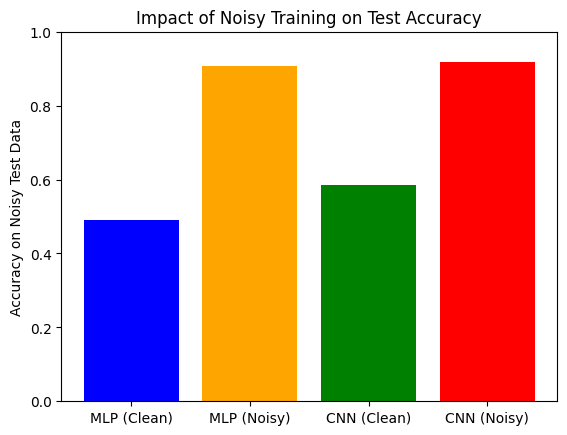

In [10]:
# Bar chart to compare accuracies
models = ['MLP (Clean)', 'MLP (Noisy)', 'CNN (Clean)', 'CNN (Noisy)']
accuracies = [mlp_clean_accuracy, mlp_noisy_accuracy, cnn_clean_accuracy, cnn_noisy_accuracy]

plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylabel("Accuracy on Noisy Test Data")
plt.title("Impact of Noisy Training on Test Accuracy")
plt.ylim(0, 1)
plt.show()


-----------------
assig't ends above

What about the performance on clean data, of the models trained on noisy data
- expected to decrease, because the model overfits(the model learns the noise too), but by how much?

In [11]:
# Evaluate performance on clean test data
mlp_clean_test_accuracy = MLP.score(x_te, mnist_te_labels)  # MLP trained on clean data
mlp_noisy_train_clean_test_accuracy = MLP_noisy.score(x_te, mnist_te_labels)  # MLP trained on noisy data

cnn_clean_test_accuracy = cnn_model.evaluate(x_te_conv, mnist_te_labels, verbose=0)[1]  # CNN trained on clean data
cnn_noisy_train_clean_test_accuracy = cnn_model_noisy.evaluate(x_te_conv, mnist_te_labels, verbose=0)[1]  # CNN trained on noisy data

print(f"MLP Accuracy on Clean Test Data (Clean Training): {mlp_clean_test_accuracy:.2f}")
print(f"MLP Accuracy on Clean Test Data (Noisy Training): {mlp_noisy_train_clean_test_accuracy:.2f}")

print(f"CNN Accuracy on Clean Test Data (Clean Training): {cnn_clean_test_accuracy:.2f}")
print(f"CNN Accuracy on Clean Test Data (Noisy Training): {cnn_noisy_train_clean_test_accuracy:.2f}")


MLP Accuracy on Clean Test Data (Clean Training): 0.98
MLP Accuracy on Clean Test Data (Noisy Training): 0.97
CNN Accuracy on Clean Test Data (Clean Training): 0.98
CNN Accuracy on Clean Test Data (Noisy Training): 0.96
